In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

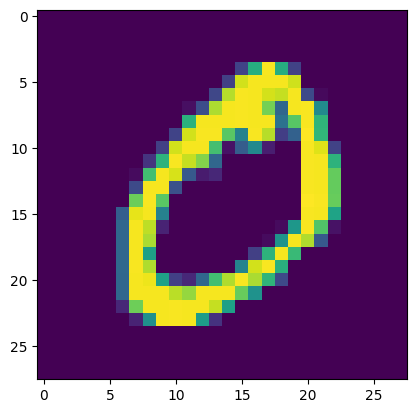

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [ ]:
X_train = X_train/255 # all values will be 0 - 1
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
# architecture
model = Sequential()

model.add(Flatten(input_shape=(28,28)))  # converting in to 1D... [28 * 28 image size]
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) # softmax for multiple classes

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])  #

In machine learning, the `model.compile()` function is used to configure the learning process of a neural network model before training. This function defines important components such as the loss function, optimizer, and evaluation metrics.

Let's break down the arguments in the `model.compile()` function:

- `loss='sparse_categorical_crossentropy'`: This argument specifies the loss function to be used during training. In this case, `'sparse_categorical_crossentropy'` is chosen, which is commonly used for multi-class classification problems where the target labels are integers. This loss function calculates the difference between the predicted probabilities and the true class labels.

- `optimizer='Adam'`: The optimizer determines how the neural network model will update its internal parameters (weights and biases) based on the loss function. `'Adam'` refers to the Adam optimizer, which is a popular optimization algorithm known for its efficiency in training deep neural networks. Adam adjusts the learning rate adaptively for each parameter, leading to faster convergence and better generalization.

- `metrics=['accuracy']`: This argument specifies the evaluation metric(s) to be used to assess the performance of the model during training and testing. `'accuracy'` is chosen as the metric in this case, which measures the proportion of correctly classified samples out of the total number of samples. It provides a straightforward measure of how well the model is performing in terms of classification accuracy.

Overall, `model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])` sets up the model for training by defining the loss function, optimizer, and evaluation metric(s). Once the model is compiled, it can be trained on a dataset using the `model.fit()` function.


In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 1.0209 - accuracy: 0.6744 - val_loss: 0.5473 - val_accuracy: 0.8471
Epoch 2/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4773 - accuracy: 0.8632 - val_loss: 0.3954 - val_accuracy: 0.8821
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3833 - accuracy: 0.8911 - val_loss: 0.3378 - val_accuracy: 0.9036
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3424 - accuracy: 0.9016 - val_loss: 0.3095 - val_accuracy: 0.9122
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3145 - accuracy: 0.9089 - val_loss: 0.2834 - val_accuracy: 0.9176
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2906 - accuracy: 0.9158 - val_loss: 0.2710 - val_accuracy: 0.9207
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2714 - accuracy: 0.9212 - val_loss: 0.2478 - val_accuracy

The line of code `history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)` is used to train a neural network model with a given dataset. Let's break down the arguments in this line:

- `X_train`: This is the input data that will be used to train the model. It represents the features or input variables for each training example. The shape of `X_train` should be `(num_examples, num_features)`.

- `y_train`: This is the target or output data corresponding to `X_train`. It contains the expected output or labels for each training example. The shape of `y_train` should be `(num_examples,)` for a single output or `(num_examples, num_classes)` for multi-class classification, where `num_classes` is the number of distinct classes.

- `epochs=25`: The `epochs` parameter determines the number of times the entire dataset will be used to train the model. In this case, the model will go through the entire dataset 25 times during training.

- `validation_split=0.2`: This argument specifies the portion of the training data that will be used for validation. Here, 20% of the training data (selected randomly) will be used as a validation set to monitor the model's performance during training. The validation data helps in detecting overfitting and provides an estimate of the model's performance on unseen data.

The `model.fit()` function trains the model by optimizing its internal parameters based on the provided data and labels. It uses the configured loss function, optimizer, and evaluation metrics from the `model.compile()` step. During training, the model updates its parameters iteratively to minimize the loss and improve its performance.

The `model.fit()` function returns a `history` object, which contains information about the training process, such as the loss and accuracy values at each epoch. This object can be used for further analysis, visualization, or evaluation of the trained model.

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


The line of code `y_prob = model.predict(X_test)` is used to make predictions using a trained neural network model. Let's break down the components of this line:

- `model`: This refers to the trained neural network model that has been previously compiled and fitted on the training data.

- `predict()`: This is a method in the model object that is used to generate predictions based on the given input data.

- `X_test`: This represents the input data for which we want to obtain predictions. It contains the features or input variables for each test example. The shape of `X_test` should match the shape expected by the model's input layer.

When this line of code is executed, the trained model takes the provided `X_test` data and applies its learned weights and biases to produce predictions. The output of `model.predict(X_test)` is assigned to the variable `y_prob`.

- `y_prob`: This variable represents the predicted probabilities for each class or output category for the given test examples. The shape of `y_prob` is `(num_examples, num_classes)`, where `num_examples` is the number of test examples, and `num_classes` is the number of distinct classes.

The predicted probabilities in `y_prob` indicate the model's confidence in assigning each test example to different classes. Depending on the problem at hand, you can interpret these probabilities to make decisions or further analyze the model's performance.

It's important to note that if you need discrete predictions (class labels), you can use the `argmax()` function to convert the predicted probabilities to the corresponding class indices. For example, `y_pred = np.argmax(y_prob, axis=1)` will give you the predicted class labels for each test example in `X_test`.


In [ ]:
y_pred = y_prob.argmax(axis=1)

The line of code `y_pred = y_prob.argmax(axis=1)` is used to convert the predicted probabilities into discrete class labels or predictions. Let's break down the components of this line:

- `y_prob`: This variable represents the predicted probabilities for each class or output category. It is typically obtained from the output of the `model.predict()` method.

- `argmax()`: This is a function that returns the indices of the maximum values along a specified axis. In this case, `axis=1` is specified, which means the function will find the maximum value along each row of `y_prob`.

- `y_pred`: This variable represents the discrete class labels or predictions corresponding to the maximum probability values. It is assigned the result of `y_prob.argmax(axis=1)`.

By applying `argmax(axis=1)` to `y_prob`, we obtain the index (or class label) corresponding to the highest predicted probability for each test example. This effectively converts the predicted probabilities into the predicted class labels.

The resulting `y_pred` variable will have the shape `(num_examples,)`, where `num_examples` is the number of test examples. Each element of `y_pred` represents the predicted class label for the corresponding test example.

Converting the predicted probabilities to discrete class labels allows for easier interpretation and evaluation of the model's performance. It enables comparison with the true labels or ground truth values to calculate metrics such as accuracy, precision, recall, or F1-score.

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9624

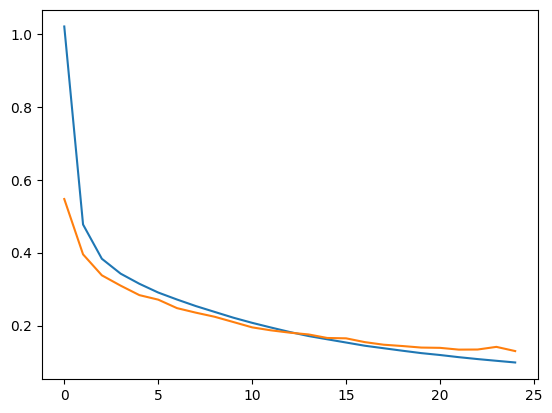

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

The code `plt.plot(history.history['loss'])` and `plt.plot(history.history['val_loss'])` are used to plot the loss values during the training process of a neural network model.

- `history`: This variable represents the `history` object returned by the `model.fit()` function, which contains information about the training process, including the loss and other metrics recorded at each epoch.

- `history.history['loss']`: This retrieves the values of the training loss recorded during the training process. It represents the loss function value at each epoch during the training phase.

- `history.history['val_loss']`: This retrieves the values of the validation loss recorded during the training process. It represents the loss function value at each epoch on the validation set, which is a subset of the training data used for monitoring the model's performance during training.

- `plt.plot()`: This is a function from the `matplotlib.pyplot` library used to plot a line graph. It takes as input the values to be plotted, which are provided as arguments inside the `plot()` function.

By executing `plt.plot(history.history['loss'])`, a line graph of the training loss values is plotted. Each point on the graph represents the loss value at a particular epoch during training.

Similarly, `plt.plot(history.history['val_loss'])` plots a line graph of the validation loss values. This helps visualize how the model's performance on the validation set changes over the course of training.

By plotting the loss values, you can gain insights into the progress of the model's training. A decreasing training loss indicates that the model is learning and improving, while the validation loss helps identify if the model is overfitting or not generalizing well to unseen data.

To display the plotted graphs, it is assumed that the `matplotlib.pyplot` library has been imported as `plt`, and the code is executed within an appropriate environment or notebook that supports visualization.

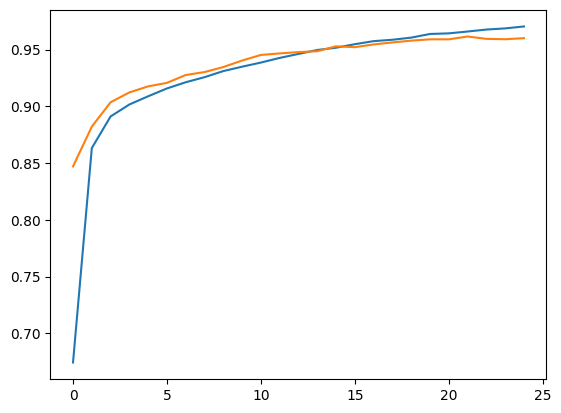

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

The code `plt.plot(history.history['accuracy'])` and `plt.plot(history.history['val_accuracy'])` are used to plot the accuracy values during the training process of a neural network model.

- `history`: This variable represents the `history` object returned by the `model.fit()` function, which contains information about the training process, including the accuracy and other metrics recorded at each epoch.

- `history.history['accuracy']`: This retrieves the values of the training accuracy recorded during the training process. It represents the proportion of correctly classified examples at each epoch during the training phase.

- `history.history['val_accuracy']`: This retrieves the values of the validation accuracy recorded during the training process. It represents the proportion of correctly classified examples at each epoch on the validation set, which is a subset of the training data used for monitoring the model's performance during training.

- `plt.plot()`: This is a function from the `matplotlib.pyplot` library used to plot a line graph. It takes as input the values to be plotted, which are provided as arguments inside the `plot()` function.

By executing `plt.plot(history.history['accuracy'])`, a line graph of the training accuracy values is plotted. Each point on the graph represents the accuracy value at a particular epoch during training.

Similarly, `plt.plot(history.history['val_accuracy'])` plots a line graph of the validation accuracy values. This helps visualize how the model's performance on the validation set changes over the course of training.

Plotting the accuracy values allows us to track how well the model is learning and improving its ability to classify examples correctly. A rising training accuracy indicates that the model is learning and becoming more accurate on the training data. The validation accuracy helps us assess how well the model generalizes to unseen data and if it is overfitting.

To display the plotted graphs, it is assumed that the `matplotlib.pyplot` library has been imported as `plt`, and the code is executed within an appropriate environment or notebook that supports visualization.

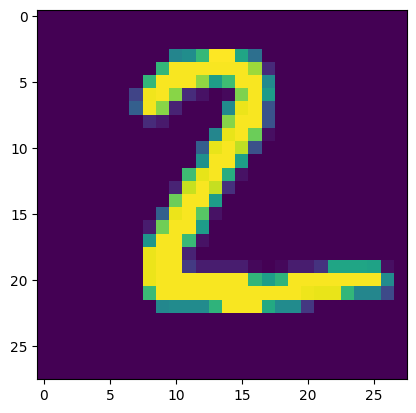

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([2])

The code `model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)` is used to make a prediction on a single test example using a trained neural network model.

Let's break down the components of this code:

- `model`: This refers to the trained neural network model that has been previously compiled and fitted on the training data.

- `X_test[1]`: This selects the second test example from the `X_test` dataset. Assuming `X_test` is an array of test examples, this line retrieves the specific example at index 1 (arrays in Python are zero-indexed).

- `.reshape(1, 28, 28)`: This reshapes the test example to match the input shape expected by the model. In this case, it reshapes the example to have a batch size of 1 and a shape of (28, 28). This is necessary because the model expects inputs in a specific shape.

- `model.predict()`: This method is used to generate predictions based on the given input data.

- `argmax(axis=1)`: This function returns the index of the maximum value along the specified axis. In this case, `axis=1` is specified, which means the function will find the maximum value along the second axis (row) of the predicted probabilities.

The code `model.predict(X_test[1].reshape(1, 28, 28))` generates the predicted probabilities for the reshaped test example. The output of this line will be an array containing the predicted probabilities for each class or output category.

Finally, `.argmax(axis=1)` is applied to the predicted probabilities to obtain the index of the class with the highest predicted probability. This effectively gives us the predicted class label for the test example.

Overall, this line of code takes a single test example, reshapes it to match the model's input shape, generates the predicted probabilities for each class, and then determines the predicted class label by finding the class with the highest probability.
In the context of `argmax(axis=1)`, the choice of `axis` determines the axis along which the maximum value is computed.

Let's consider a scenario where we have predicted probabilities for multiple classes, represented as an array. Each row in the array corresponds to a different example, and each column represents the predicted probability for a specific class.

By specifying `axis=1`, we are instructing the `argmax()` function to find the maximum value along each row of the array. In other words, it will return the index of the highest predicted probability for each example. This is suitable when we want to obtain the predicted class label for each individual example.

On the other hand, if we were to use `argmax(axis=0)`, the function would find the maximum value along each column of the array. This would return the index of the highest predicted probability for each class across all examples. This usage is less common when determining the predicted class label for individual examples.

In summary, `axis=1` is used in this context because we want to find the maximum value along each row (across the different classes) to obtain the predicted class label for each example individually.